In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
df = pd.read_csv('SeoulBikeData.csv')

In [6]:

try:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df = df.drop(['Date'], axis=1)
except Exception as e:
    print(f"Datetime conversion error: {e}")
    print("Proceeding without datetime features")
    df = df.drop(['Date'], axis=1, errors='ignore')

In [7]:

df.columns = df.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
df.columns = df.columns.str.lower()

In [8]:

numeric_cols = [
    'hour', 'temperature_c', 'humidity_percent', 
    'wind_speed_m_s', 'visibility_10m', 
    'dew_point_temperature_c', 'solar_radiation_mj_m2',
    'rainfall_mm', 'snowfall_cm'
]

In [9]:

numeric_cols = [col for col in numeric_cols if col in df.columns]

if numeric_cols:
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
else:
    print("Warning: No numeric columns found for scaling")

In [10]:

categorical_cols = ['seasons', 'holiday', 'functioning_day']
for col in categorical_cols:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col])
    else:
        print(f"Warning: Categorical column {col} not found")

In [11]:

X = df.drop(['rented_bike_count'], axis=1)
y = df['rented_bike_count']

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:

model = RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [14]:

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Model Performance:
MSE: 48607.61
R-squared: 0.89


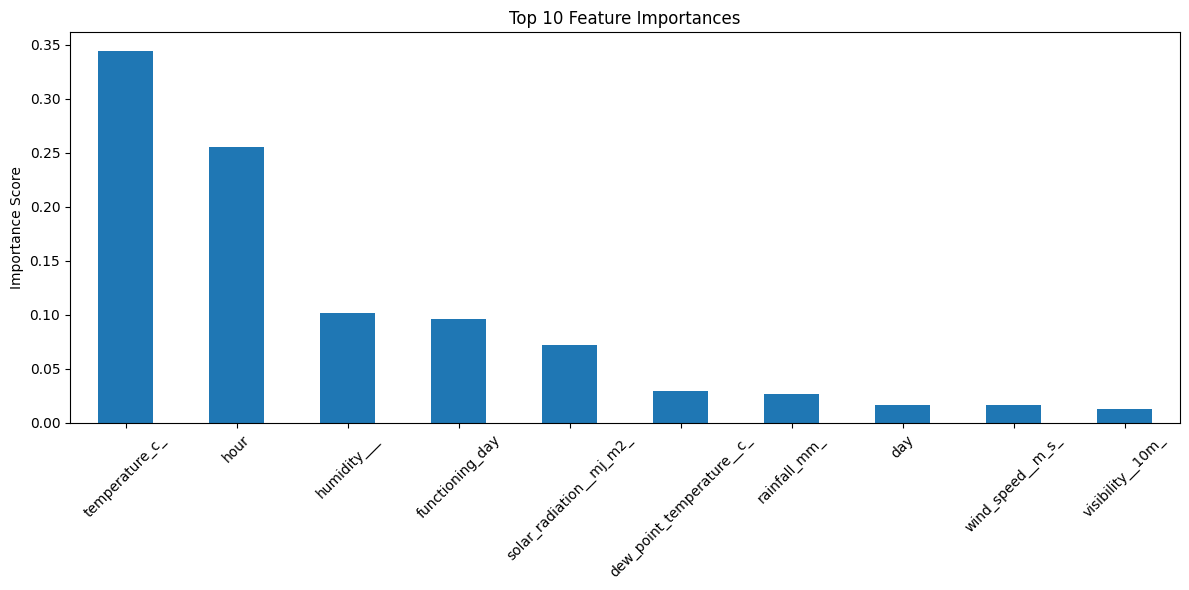

In [15]:

plt.figure(figsize=(12,6))
pd.Series(model.feature_importances_, index=X.columns).nlargest(10).plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19632\235679332.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


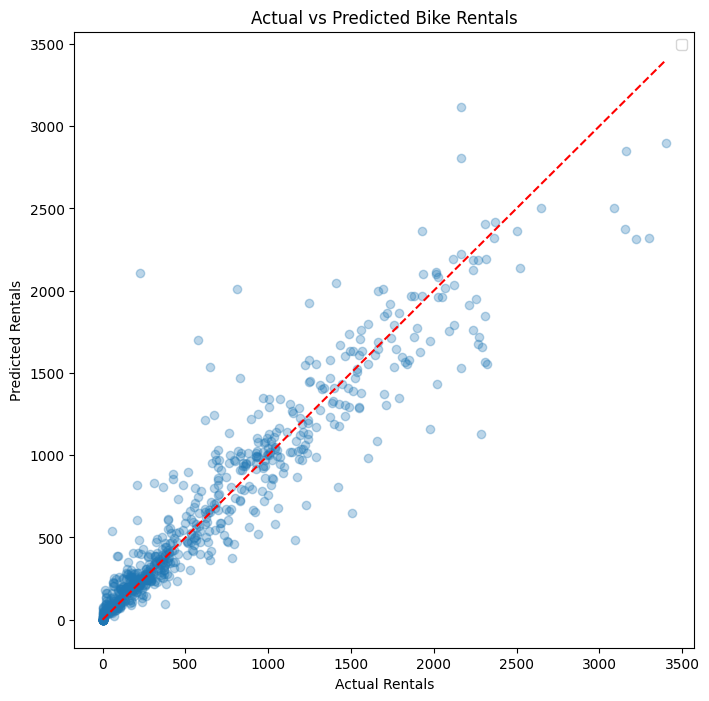

In [17]:

plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.title('Actual vs Predicted Bike Rentals')
plt.legend()
plt.show()

In [18]:

print("\nKey Insights:")
print("1. Most important features:", list(pd.Series(model.feature_importances_, index=X.columns).nlargest(3).index))
print("2. Model explains {:.1f}% of variance (R-squared)".format(r2*100))
print("3. Average prediction error: {:.1f} bikes (RMSE)".format(np.sqrt(mse)))


Key Insights:
1. Most important features: ['temperature_c_', 'hour', 'humidity___']
2. Model explains 88.9% of variance (R-squared)
3. Average prediction error: 220.5 bikes (RMSE)
